In [4]:
### Amino acid property analysis ###
# WT no IgM

# analyze physico-chemical properties (CDR3) of Ig sequences.

# Load required packages
library(alakazam)
library(dplyr)
library(scales)
library(ggplot2)

db <- readChangeoDb("r_igg_only_filtered_contig_heavy_germ-pass.tsv", select = NULL, drop = NULL, seq_upper = TRUE)

In [5]:
### "aminoAcidProperties" function can determine:

# length: total amino acid count
# gravy: grand average of hydrophobicity
# bulkiness: average bulkiness
# polarity: average polarity
# aliphatic: normalized aliphatic index
# charge: normalized net charge
# acidic: acidic side chain residue content
# basic: basic side chain residue content
# aromatic: aromatic side chain content

# calculate all of the available aa properties translated from dna seq in the junction column.
# "trim" option strip off the first and last codon that are the conserved residues before the analysis.

# first, look at the wildtype

db_cdr3_r <- aminoAcidProperties(db, seq="junction", nt=TRUE, trim=TRUE, label="cdr3")

# The full set of properties are calculated by default
dplyr::select(db_cdr3_r[1:3, ], starts_with("cdr3"))

,cdr3,cdr3_aa_length,cdr3_aa_gravy,cdr3_aa_bulk,cdr3_aa_aliphatic,cdr3_aa_polarity,cdr3_aa_charge,cdr3_aa_basic,cdr3_aa_acidic,cdr3_aa_aromatic
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,GCAAGGGATTACTACGGTAGCGTCTGGTACTTCGATGTC,13,-0.3461538,15.43923,0.5230769,7.984615,-1.005349555,0.07692308,0.15384615,0.3846154
2,GCGAGATCTTATGGTAGCTATTACTATGCTATGGACTAC,13,-0.8461538,13.66923,0.1538462,7.984615,-0.009648261,0.07692308,0.07692308,0.3846154
3,GCTAGAGGCGATTACGCCTTTGACTAC,9,-0.9000000,13.32222,0.2222222,8.811111,-1.003358266,0.11111111,0.22222222,0.3333333


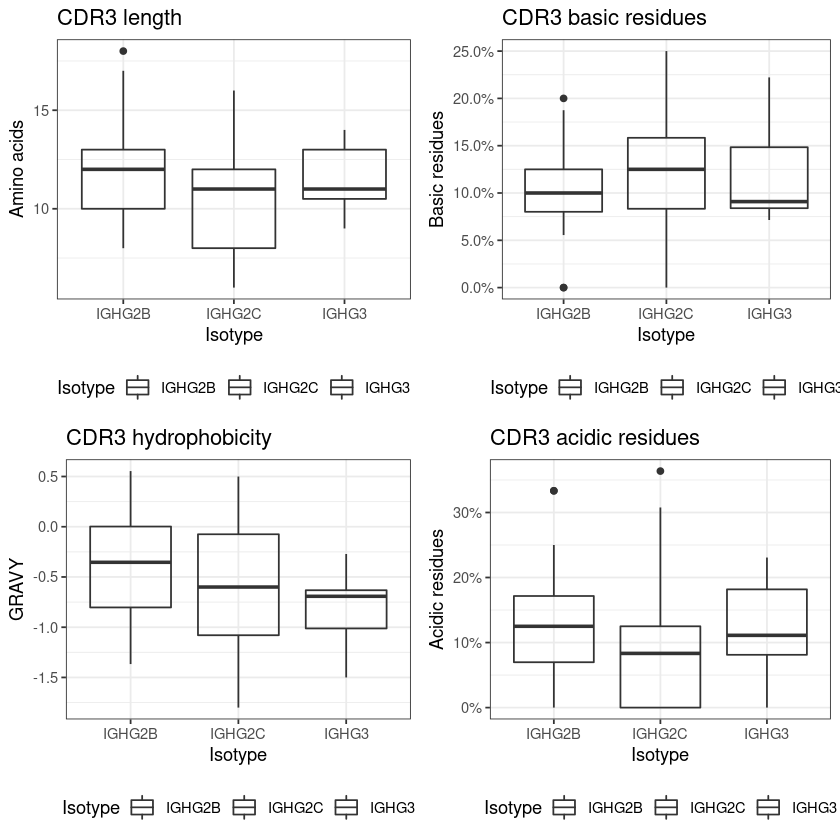

In [6]:
# Define a ggplot theme for all plots
tmp_theme <- theme_bw() + theme(legend.position="bottom")

# Generate plots for all four of the properties
g1_r <- ggplot(db_cdr3_r, aes(x=c_call, y=cdr3_aa_length)) + tmp_theme +
    ggtitle("CDR3 length") + 
    xlab("Isotype") + ylab("Amino acids") +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot(aes(fill=c_call))
g2_r <- ggplot(db_cdr3_r, aes(x=c_call, y=cdr3_aa_gravy)) + tmp_theme + 
    ggtitle("CDR3 hydrophobicity") + 
    xlab("Isotype") + ylab("GRAVY") +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot(aes(fill=c_call))
g3_r <- ggplot(db_cdr3_r, aes(x=c_call, y=cdr3_aa_basic)) + tmp_theme +
    ggtitle("CDR3 basic residues") + 
    xlab("Isotype") + ylab("Basic residues") +
    scale_y_continuous(labels=scales::percent) +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot(aes(fill=c_call))
g4_r <- ggplot(db_cdr3_r, aes(x=c_call, y=cdr3_aa_acidic)) + tmp_theme +
    ggtitle("CDR3 acidic residues") + 
    xlab("Isotype") + ylab("Acidic residues") +
    scale_y_continuous(labels=scales::percent) +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot(aes(fill=c_call))

# Plot in a 2x2 grid
gridPlot(g1_r, g2_r, g3_r, g4_r, ncol=2)

# need to fix the width size to display the full labels.
# baseTheme(sizing = c("figure", "window"))